# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.1: Distributions and Random Processes

### 1.1.2: Distributions

Many real world phenomena can be modelled with random variables, which is particularly useful when we do not have all possible information about a given environment. Consider a die roll, where we throw a die into the air, and see which number is on top.

The die has six possible outcomes: 1, 2, 3, 4, 5 and 6, which are the possible states or values. It is impossible* to get a value other than these six distinct possible.

<div class="alert alert-warning">
    * Some might argue that it would be possible to properly model a die throw and know what the result would be. Whether it is possible is the type of question that keeps physicists up at night, however it almost certainly would be more effort than it's worth.
</div>

Here is a simulation of a die roll.

In [3]:
import random

possible_states = [1, 2, 3, 4, 5, 6]

random.choice(possible_states)

4

If we run this simulation 100,000 times, we can get an *empirical estimate* of the distribution:

In [4]:
NUM_TRIALS = 100000

results = [random.choice(possible_states) for i in range(NUM_TRIALS)]


In [5]:
from collections import Counter
counts = Counter(results)
counts

Counter({1: 16908, 3: 16509, 4: 16664, 2: 16802, 5: 16473, 6: 16644})

In [6]:
import altair as alt
import vega
alt.renderers.enable('default')  # Setup your environment to show altair plots.  Note this option depends on where you are running your code.

RendererRegistry.enable('default')

In [7]:
import pandas as pd

die_rolls = pd.DataFrame({
    'state': possible_states,
    'count': [counts.get(state, 0) for state in possible_states]
})

print(die_rolls)

alt.Chart(die_rolls).mark_bar().encode(
    x='state:O',
    y='count'
)

   state  count
0      1  16908
1      2  16802
2      3  16509
3      4  16664
4      5  16473
5      6  16644


alt.Chart(...)

As one might expect with a "fair" die roll like this, the estimates are about the same (your results may vary).

More formally, we have a random variable $X$ such that the value of $X$ is the result of rolling a fair die. The distribution of $X$ is the following:


$
\begin{gather*}
  P(X=x) = \begin{cases}
  \frac{1}{6} & \text{if $x \in \{1,2,3,4,5,6\}$}\\
  0 & \text{otherwise.}
  \end{cases}
\end{gather*}
$

In this case, all options (at least, the valid ones) have the same likelihood of appearing, and therefore the resulting distribution is known as a *uniform distribution*. Uniform distributions can occur for both discrete and continuous variables.

A **discrete** variable is one that takes on a fixed set of values, such as a die roll or the month you were born. They are usually finite (i.e. there is only so many of them), but the requirement is technically that they be *countable*, which allows for infinite discrete values (think of the integers as a discrete infinite random variable).

A **continuous** variable is one that can take on an arbitrary value. As an example, the amount of liquid in a cup is continuous. It can be 350ml, or 350.1ml, or 350.1252342ml, or so on, with infinite precision (we will ignore the effect of the Planck constant). 

Distributions exist for both discrete random variables, as we saw above, and for continuous random variables, however they often behave differently.

In [8]:
%%html
<!-- Run me, but there is  need to worry about this code - 
    it makes the equation in the next cell larger and more readable -->
<style>
    .big_function {font-size: 200%;}
</style>

### Normal Distributions
Let's create a normal distribution, which is a continuous distribution centred around 0 and with a standard deviation of 1.

A normal distribution is the most commonly seen continuous distribution, and the one most people are familiar with. The equation for the graph is:

<div class="big_function">
    $y = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
</div>

In [12]:
# Let's plot that out
import numpy as np
x = np.linspace(-5, 5, 1000)  # 1000 linearly spaced points starting -5 going to 5

mean = 0
sigma = 1

y = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.e ** -((x - mean) ** 2) / (2 * sigma ** 2)

# Or a bit more nicely laid out...

scale_term = (1 / np.sqrt(2 * np.pi * sigma ** 2))
exponent_term = ((x - mean) ** 2) / (2 * sigma ** 2)
y = scale_term * np.e ** -exponent_term

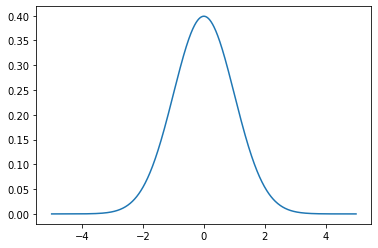

In [13]:
from matplotlib import pyplot as plt
plt.plot(x, y, "-");

In [14]:
from scipy import stats

In [15]:
n = stats.norm(0, 1)

In [16]:
# Generate 10 random variates from this distribution
n.rvs(10)

array([-0.12412694,  0.78286318, -0.2536435 , -1.07421581, -0.1162626 ,
        0.963849  ,  1.15496496,  0.63165475, -0.3517302 ,  1.9828123 ])

In [17]:
# note that Counter isn't very helpful here. It is *highly* likely that all counts will be 1
# regardless of how many values you generate. In fact, it's nearly impossible to get the same value twice.
results = n.rvs(10)

In [18]:
Counter(results)

Counter({0.10703127193584497: 1,
         0.14236308643132137: 1,
         0.5542097050075205: 1,
         -0.690753480114846: 1,
         -1.1183858165422245: 1,
         -1.2827622508167755: 1,
         0.1999070306558162: 1,
         -1.4312531428899704: 1,
         0.6642871661116427: 1,
         0.6559095747173593: 1})

In [19]:
# Histograms work better here

normal_values = pd.DataFrame({"value": n.rvs(5000)})

alt.Chart(normal_values).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),
    y='count()',
    color=alt.value('#287E1E'),  # Aside: Note US spelling. Also try "hex codes": https://htmlcolorcodes.com/
)

alt.Chart(...)


<div class="alert alert-success">
Note that Altair won't let us directly compute a histogram with more than 5000 rows. To do that, check out this example, which saves the data to a local temporary json file, and then displays from that. Without doing this, Altair embeds a *copy* of the data in a graph!

In [20]:
if not alt.data_transformers.active == 'json':  # Check json isn't already active
    import os
    # Make a temp folder to put these json files in - Altair creates a lot of them!
    dataset_temp_name = 'altair-temp-data/'
    if not os.path.exists(dataset_temp_name):
        # if the folder doesn't exist, create it
        os.mkdir(dataset_temp_name)
    # Tell Altair to temporary save datasets it needs to that folder
    alt.data_transformers.enable('json', prefix=dataset_temp_name)

normal_values = pd.DataFrame({"value": n.rvs(100000)})

alt.Chart(normal_values).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),
    y='count()',
)

alt.Chart(...)

Notice the shape, the famous "bell curve" of the normal distribution. It's heavily centred around the mean (0) and the spread of data is indicated by the standard deviation.

#### Exercises

1. Plot a histogram of the standard deviation with the following properties:

    1. Mean ($\mu$) of 1, standard deviation ($\sigma$) of 7
    2. $\mu=10, \sigma=1$
    3. $\mu=-10, \sigma=5$
2. Create a python function that accepts two inputs (`mean` and `standard_deviation`) and plots the histogram as per question 1.

3. Investigate the documentation of Altair and overlay these plots on top of each other, with different colours, giving a result that looks like this:
<img src="img/snapshot.png">

In [27]:
# (1) (doing this from scratch so just this chunk can be run)
import pandas as pd
from scipy import stats
import altair as alt
alt.renderers.enable('default')

mean_std_list = [(1,7), (10,1), (-10,5)]

for vals in mean_std_list:
    norm_dist_func = stats.norm(vals[0], vals[1])
    results = norm_dist_func.rvs(1000)
    normal_values = pd.DataFrame({"value": results})
    norm_plot = alt.Chart(normal_values, title="Normal Distribution histogram with mean " + str(vals[0]) + " and standard deviation " + str(vals[1])).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),
    y='count()',)
    norm_plot.display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [39]:
# (2)
def display_norm(mean, std):
    norm_dist_func = stats.norm(mean, std)
    results = norm_dist_func.rvs(1000)
    normal_values = pd.DataFrame({"value": results})
    norm_plot = alt.Chart(normal_values, title="Normal Distribution histogram with mean " + str(mean) + " and standard deviation " + str(std)).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)),
    y='count()',)
    return(norm_plot)
    
c1 = display_norm(1, 7)
c2 = display_norm(10, 1)
c3 = display_norm(-10, 5)

c1.display()
c2.display()
c3.display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [59]:
# (3) Compound Histogram Altair
df = pd.DataFrame({'Norm 1': stats.norm(1,7).rvs(6000),
                   'Norm 2': stats.norm(10,1).rvs(6000),
                   'Norm 3': stats.norm(-10,5).rvs(6000)})

colors = ["grey", "red", "green"]

# alt.Chart(df).transform_fold(
#     ['Norm 1', 'Norm 2', 'Norm 3'],
#     as_=['Columns', 'Values']
# ).mark_area(
#     opacity=0.8,
#     interpolate='step'
# ).encode(
#     alt.X('Values:Q', bin=alt.Bin(maxbins=300)),
#     alt.Y('count()', stack=None),
#     alt.Color('Columns:N'))

def display_norm(distribution, col):
    normal_values = pd.DataFrame({"value": distribution})
    norm_plot = alt.Chart(normal_values).mark_bar().encode(
    alt.X("value", bin=alt.Bin(maxbins=100)), color=alt.value(col),
    y='count()',)
    return(norm_plot)

c = []
for i in range(df.shape[1]):
    c.append(display_norm(df.iloc[:, i], col = colors[i]))

c[0] + c[1] + c[2]


alt.LayerChart(...)

*For solutions, see `solutions/normal_distributions.py`*

### Probability Density Functions

The histograms we were looking at above are approximations of what is known as a *Probability Density Function*, or PDF. A PDF shows us the probability of a given value, for a discrete random variable.

For a continuous random variable, any *exact* value has a probability of 0 (think about why this is the case). We can only give probabilities for ranges. For a lower bound of $a$ and an upper bound of $b$, we can obtain the probability of a random value lying between $a$ and $b$ by integrating the PDF between those values. For example, if our PDF function is $f(x)$, then the probability of random variable $X$ lying between $a$ and $b$ is given by:

$P[a <= X <= b] = \int_a^b f(x) dx$

As an aside, and very informally, you can think of "the probability of $X=2$" as being a range *about* 2, say any value between 1.99 and 2.01 (or whatever precision makes sense in the context). Be clear on this definition when you do go to present your findings though, as a formal definition will be needed to replicate your results.

We can generate the PDF through the `.pdf` method on a `scipy.stats` distribution. Earlier in this notebook we computed this manually through the equation. Now we let a library do the work for us.

In [60]:
n = stats.norm(0, 1)

In [61]:
n

In [62]:
x = np.linspace(-4, 4, 1000)
y = n.pdf(x)

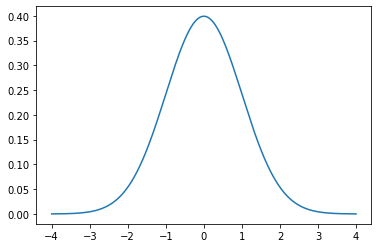

In [63]:
plt.plot(x, y);

As with all probabilities, the sum or integral of the probabilities of all possible outcomes must equal one. In a die roll, each outcome (1, 2, 3, 4, 5, 6) has an probability of $\frac{1}{6}$. Summed, that equals one.

In a continuous scenario, the *area under the curve* must sum to 1.0 across the full range. That is:

$\int_{-\infty}^{\infty}f(x)dx = 1$

<div class="alert alert-warning">
    Note that the value $f(x)$ is not a probability! It might look like one, but it's the <i>area under the curve</i> that gives us the probability.
</div>

For a given function, if it is positive or 0 everywhere, and the area under the curve integrates to 1, the function is a valid probability density function.

Some functions are valid only under a given domain. For instance, the function $y = ax(b-x)$ is only positive for $0<=x<=b$. In this case, if the area under the curve sums to 1 across that domain, the function is a valid PDF for that domain.



#### Exercises
Using three different distribution classes in `scipy.stats`, run the following experiment:

1. Compute 10,000 random values. Compute and save the mean.
2. Repeat step 1, 1,000 times
3. Plot the histogram of the mean values and observe the shape.

Use the distributions `norm`, `cosine` and `uniform`.

This finding is why the normal distribution is so important, and so commonly found in nature.

**Hint:** See this example for how to do independent axes with Altair: https://altair-viz.github.io/gallery/layered_plot_with_dual_axis.html?highlight=resolve_scale (link not working)

#### Extended exercise

Load a random dataset, and perform the same exercise with the real world data - that is, take the mean of each of 1,000 samples of size 10,000 and plot the histogram. What shaped distribution does it look like?

In [71]:
# (1)

def get_rv_sample_mean(distribution, n_sample = 10000):
    samp = distribution.rvs(n_sample)
    return samp.mean()


def list_of_means(distribution, n_means = 1000, n_sample = 10000):
    samp_means = []
    for i in range(n_means):
        samp_means.append(get_rv_sample_mean(distribution, n_sample))
    return samp_means


distributions = dict([("normal", stats.norm(0,1)),
                 ("cosine", stats.cosine(0, 1)),
                 ("uniform", stats.uniform(0, 1))
                ])


means = pd.DataFrame({distribution_name: list_of_means(distribution)
                  for distribution_name, distribution in distributions.items()})


for dist in distributions:
    nplot = alt.Chart(means[[dist]]).mark_bar().encode(alt.X(dist, bin=alt.Bin(maxbins=100)), y='count()',)
    nplot.display()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

*For solutions, see `solutions/plotting_distributions.py`*

### Cumulative Density Function

A cumulative density function (CDF) tells us the probability of a value being less than, or equal to, a given value. A CDF is normally more useful for everyday usage.

Here is the CDF for the normal distribution:

In [72]:
distribution = stats.norm()

In [73]:
x = np.linspace(-5, 5, 1000)
y_cdf = distribution.cdf(x)

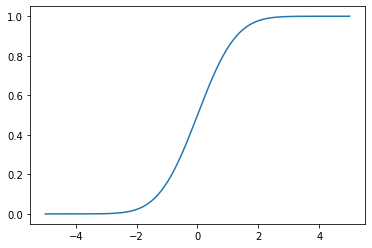

In [74]:
plt.plot(x, y_cdf);


This graph allows us to compute the probability that a random value is chosen from the normal distribution ($\mu=0, \sigma=1$) will be less than or equal to the given $x$ value.

For example, to determine the probability a given value is less than or equal to 1.2, we find the $y$ value corresponding to the given $x$ value:

At x=1.2, y=0.885


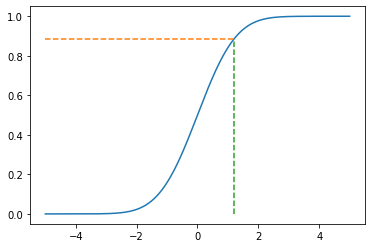

In [75]:
x_0 = 1.2
y_0 = distribution.cdf(x_0)

plt.plot(x, y_cdf)
plt.plot([x[0], x_0], [y_0, y_0], '--')
plt.plot([x_0, x_0], [0, y_0], '--')
print("At x={0}, y={1:.3f}".format(x_0, y_0))

Some major properties of a CDF, defined as $F_X(x)$ are:
 
* The range (the values y can take) are between (and including) 0 and 1. This comes from its use as a probability computation - see the next point. Formally, $0 <= F_X(x) <= 1$ for any value $x$
* The likelihood a value is less than or equal to infinity must be 1, and the likelihood it is less than or equal to negative infinity must be 0. Formally, $F_X(-\infty)=0$ and $F_X(\infty)=1$
* The CDF value is *increasing*. That is, it must have a positive or zero slope (but not a negative one). Formally, $F_X(a) <= F_X(b) \text{ iff } a < b$
 
Further, if your random variable has a domain, then the CDF is 0 for all values less than the minimum domain, and 1 for any value above the maximum of the domain.

To find the probability that a random variable lies within a range, subtract the value of the CDF at the minimum from the value at the maximum:

$P(a < X <= b) = F_X(b) - F_X(a)$

For a continuous distribution (like the normal distribution), the CDF is a smooth graph. Its shape will vary, but will follow the general pattern as seen above.

For a discrete distribution, the graph is still increasing, but represents a "staircase", where the value of $F_X(x)$ between valid values remains the same. For example, for a die roll, the value of $F_X(3) == F_X(3.1)$. This makes sense, as no values between 3.0 and 3.1 can be obtained on a die, so the value $P(X<=3)$ must be the same as $P(X<=3.1)$.

#### Exercises

1. Plot the relationship between the mean of a normal distribution as $x$ (with a fixed standard deviation of 1), and the area under the curve between 0 and 1 as the $y$ axis.
2. Remake the plot, but have the standard deviation vary as $x$, and the mean fixed as 0. How can you characterise the relationship?

#### Extended exercise

Plot the CDF for rolling two dice, where the x value is the sum of the two dice, and the y value is the CDF for the distribution.

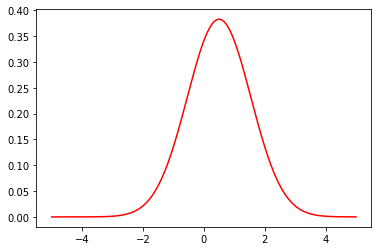

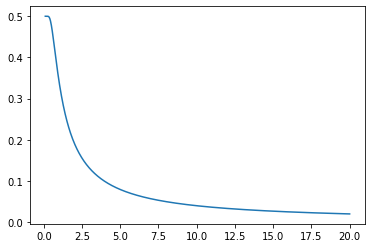

The area between 0 and 1 decreases as the standard deviation increases are values will spread out and hence have less between 0 and 1.


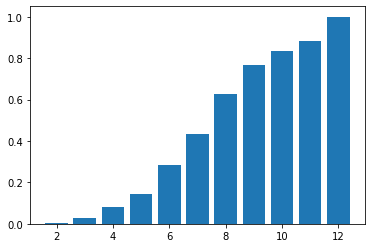

In [88]:
# Exercise 1
x_values_1 = np.linspace(-5, 5, 1000)
distributions_1 = [stats.norm(x, 1) for x in x_values_1]
y_1 = np.array([distribution.cdf(1) - distribution.cdf(0)
               for distribution in distributions_1])
plt.plot(x_values_1, y_1, "r")
plt.show()

# Exercise 2
x_values_2 = np.linspace(0.1, 20, 1000)
distributions_2 = [stats.norm(0, x) for x in x_values_2]
y_2 = np.array([distribution.cdf(1) - distribution.cdf(0)
               for distribution in distributions_2])
plt.plot(x_values_2, y_2)
plt.show()
print("The area between 0 and 1 decreases as the standard deviation increases are values will spread out and hence have less between 0 and 1.")

# Extended exercise
n_samples = 100
outcome = np.sort([random.randint(1, 6) + random.randint(1, 6) for _ in range(n_samples)])
cdf = np.cumsum(outcome)/np.sum(outcome)
plt.bar(outcome, cdf)
plt.show()


*For solutions, see `solutions/cdf_relationships.py`*